In [ ]:
import json
import os
import logging

# Setup logging
logging.basicConfig(filename='logs\data_100k\bdd_data_checks.log', level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Paths (Update as needed)
bdd_annotations_train_path = r"C:\Users\sathish\Downloads\FL_ModelForAV\data\bdd100k\label_json\det_train.json"
bdd_annotations_val_path = r"C:\Users\sathish\Downloads\FL_ModelForAV\data\bdd100k\label_json\det_val.json"
# bdd_annotations_test_path = r"C:\Users\sathish\Downloads\FL_ModelForAV\data\bdd100k\label_json\det_test.json"
image_folder_train = r"C:\Users\sathish\Downloads\FL_ModelForAV\data\bdd100k\images\train"
image_folder_val = r"C:\Users\sathish\Downloads\FL_ModelForAV\data\bdd100k\images\val"
image_folder_test = r"C:\Users\sathish\Downloads\FL_ModelForAV\data\bdd100k\images\test"

# Function to check dataset
def check_dataset(annotations_path, image_folder, dataset_name):
    try:
        with open(annotations_path, 'r') as file:
            annotations = json.load(file)
        logging.info(f"Successfully loaded JSON annotations for {dataset_name}.")
    except (FileNotFoundError, json.JSONDecodeError) as e:
        logging.error(f"Error loading JSON file for {dataset_name}: {e}")
        print(f"Error loading JSON file for {dataset_name}: {e}")
        return

    # Check total number of images in JSON
    num_images = len(annotations)
    logging.info(f"Total images in {dataset_name} JSON: {num_images}")
    print(f"Total images in {dataset_name} JSON: {num_images}")

    # Check if labels are missing
    missing_labels = sum(1 for annotation in annotations if not annotation.get("labels", []))
    logging.info(f"Images without labels in {dataset_name}: {missing_labels}")
    print(f"Images without labels in {dataset_name}: {missing_labels}")

    # Check for labels missing 'box2d'
    missing_box2d_count = sum(1 for annotation in annotations for label in annotation.get("labels", []) if "box2d" not in label)
    logging.info(f"Total labels missing 'box2d' in {dataset_name}: {missing_box2d_count}")
    print(f"Total labels missing 'box2d' in {dataset_name}: {missing_box2d_count}")

    # Check for unrecognized categories
    category_mapping = {
        "person": 1, "pedestrian": 1, "rider": 2, "car": 3, "truck": 4,
        "bus": 5, "train": 6, "motor": 7, "motorcycle": 7, "bike": 8, "bicycle": 8,
        "traffic light": 9, "traffic sign": 10, "trailer": 11,
        "other person": 12, "other vehicle": 13
    }
    
    unrecognized_categories = set()
    for annotation in annotations:
        for label in annotation.get("labels", []):
            category = label.get("category", "").strip().lower()
            if category not in category_mapping:
                unrecognized_categories.add(category)
    
    logging.info(f"Unrecognized categories in {dataset_name}: {unrecognized_categories}")
    print(f"Unrecognized categories in {dataset_name}: {unrecognized_categories}")

    # Check for missing images in dataset
    missing_images = sum(1 for annotation in annotations if not os.path.exists(os.path.join(image_folder, annotation["name"])))
    logging.info(f"Total missing images in {dataset_name}: {missing_images}")
    print(f"Total missing images in {dataset_name}: {missing_images}")

    # Additional analysis: Label distribution
    label_distribution = {}
    for annotation in annotations:
        for label in annotation.get("labels", []):
            category = label.get("category", "").strip().lower()
            if category in category_mapping:
                label_distribution[category] = label_distribution.get(category, 0) + 1
    
    logging.info(f"Label distribution in {dataset_name}: {label_distribution}")
    print(f"Label distribution in {dataset_name}: {label_distribution}")

# Run checks for train, validation, and test datasets
check_dataset(bdd_annotations_train_path, image_folder_train, "Train")
check_dataset(bdd_annotations_val_path, image_folder_val, "Validation")
# check_dataset(bdd_annotations_test_path, image_folder_test, "Test")

logging.info("BDD Data Checks completed.")


Total images in Train JSON: 69863
Images without labels in Train: 10
Total labels missing 'box2d' in Train: 0
Unrecognized categories in Train: set()
Total missing images in Train: 29147
Label distribution in Train: {'traffic light': 187871, 'traffic sign': 238270, 'car': 700703, 'pedestrian': 92159, 'bus': 11977, 'truck': 27892, 'rider': 4560, 'bicycle': 7124, 'motorcycle': 3023, 'train': 128, 'other vehicle': 804, 'other person': 210, 'trailer': 71}
Total images in Validation JSON: 10000
Images without labels in Validation: 0
Total labels missing 'box2d' in Validation: 0
Unrecognized categories in Validation: set()
Total missing images in Validation: 0
Label distribution in Validation: {'traffic sign': 34724, 'traffic light': 26884, 'car': 102837, 'rider': 658, 'motorcycle': 460, 'pedestrian': 13425, 'bus': 1660, 'truck': 4243, 'bicycle': 1039, 'other vehicle': 85, 'train': 15, 'trailer': 2, 'other person': 1}


Total images in Train JSON: 69863
Label distribution in Train: Counter({'car': 700703, 'traffic sign': 238270, 'traffic light': 187871, 'pedestrian': 92159, 'truck': 27892, 'bus': 11977, 'bicycle': 7124, 'rider': 4560, 'motorcycle': 3023, 'other vehicle': 804, 'other person': 210, 'train': 128, 'trailer': 71})


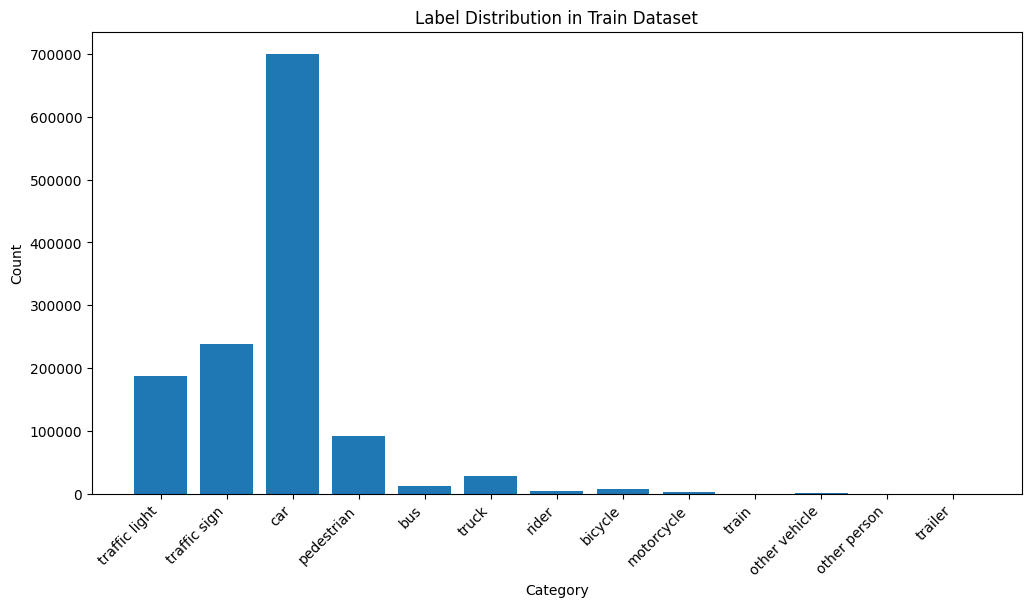

Total images in Validation JSON: 10000
Label distribution in Validation: Counter({'car': 102837, 'traffic sign': 34724, 'traffic light': 26884, 'pedestrian': 13425, 'truck': 4243, 'bus': 1660, 'bicycle': 1039, 'rider': 658, 'motorcycle': 460, 'other vehicle': 85, 'train': 15, 'trailer': 2, 'other person': 1})


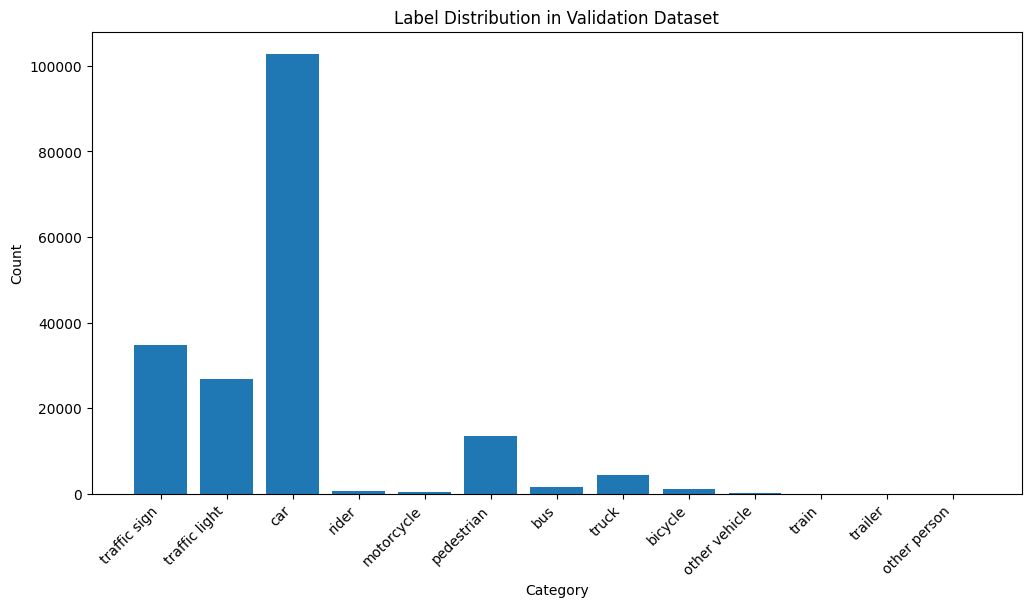

Total images in folder (Train): 40804
Total images in JSON (Train): 69863
Missing images in folder (Train): 29147
Extra images in folder (Train): 88
Total images in folder (Validation): 10000
Total images in JSON (Validation): 10000
Missing images in folder (Validation): 0
Extra images in folder (Validation): 0


In [4]:
import json
import os
import logging
import collections
import matplotlib.pyplot as plt

# Setup logging
logging.basicConfig(filename='bdd_data_checks.log', level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Paths (Update as needed)
bdd_annotations_train_path = r"C:\Users\sathish\Downloads\FL_ModelForAV\data\bdd100k\label_json\det_train.json"
bdd_annotations_val_path = r"C:\Users\sathish\Downloads\FL_ModelForAV\data\bdd100k\label_json\det_val.json"
# bdd_annotations_test_path = r"C:\Users\sathish\Downloads\FL_ModelForAV\data\bdd100k\label_json\det_test.json"
image_folder_train = r"C:\Users\sathish\Downloads\FL_ModelForAV\data\bdd100k\images\train"
image_folder_val = r"C:\Users\sathish\Downloads\FL_ModelForAV\data\bdd100k\images\val"
image_folder_test = r"C:\Users\sathish\Downloads\FL_ModelForAV\data\bdd100k\images\test"

# Function to analyze dataset
def analyze_dataset(annotations_path, dataset_name):
    try:
        with open(annotations_path, 'r') as file:
            annotations = json.load(file)
        logging.info(f"Successfully loaded JSON annotations for {dataset_name}.")
    except (FileNotFoundError, json.JSONDecodeError) as e:
        logging.error(f"Error loading JSON file for {dataset_name}: {e}")
        print(f"Error loading JSON file for {dataset_name}: {e}")
        return

    # Count images in JSON
    num_images = len(annotations)
    logging.info(f"Total images in {dataset_name} JSON: {num_images}")
    print(f"Total images in {dataset_name} JSON: {num_images}")

    # Count label occurrences
    label_counter = collections.Counter()
    for annotation in annotations:
        for label in annotation.get("labels", []):
            category = label.get("category", "").strip().lower()
            label_counter[category] += 1

    logging.info(f"Label distribution in {dataset_name}: {label_counter}")
    print(f"Label distribution in {dataset_name}: {label_counter}")

    # Plot label distribution
    plt.figure(figsize=(12, 6))
    plt.bar(label_counter.keys(), label_counter.values())
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Count")
    plt.xlabel("Category")
    plt.title(f"Label Distribution in {dataset_name} Dataset")
    plt.show()

# Function to compare images in directory and labels in JSON
def compare_images_and_labels(annotations_path, image_folder, dataset_name):
    try:
        with open(annotations_path, 'r') as file:
            annotations = json.load(file)
        logging.info(f"Successfully loaded JSON annotations for {dataset_name}.")
    except (FileNotFoundError, json.JSONDecodeError) as e:
        logging.error(f"Error loading JSON file for {dataset_name}: {e}")
        print(f"Error loading JSON file for {dataset_name}: {e}")
        return
    
    # Get list of images in folder
    images_in_folder = set(os.listdir(image_folder))
    images_in_json = set(annotation['name'] for annotation in annotations)
    
    # Find missing and extra images
    missing_in_folder = images_in_json - images_in_folder
    extra_in_folder = images_in_folder - images_in_json
    
    logging.info(f"Total images in folder ({dataset_name}): {len(images_in_folder)}")
    logging.info(f"Total images in JSON ({dataset_name}): {len(images_in_json)}")
    logging.info(f"Missing images in folder ({dataset_name}): {len(missing_in_folder)}")
    logging.info(f"Extra images in folder ({dataset_name}): {len(extra_in_folder)}")
    
    print(f"Total images in folder ({dataset_name}): {len(images_in_folder)}")
    print(f"Total images in JSON ({dataset_name}): {len(images_in_json)}")
    print(f"Missing images in folder ({dataset_name}): {len(missing_in_folder)}")
    print(f"Extra images in folder ({dataset_name}): {len(extra_in_folder)}")
    
    if missing_in_folder:
        logging.warning(f"Missing images in folder ({dataset_name}): {missing_in_folder}")
        print(f"Warning: Missing images in folder ({dataset_name}): {missing_in_folder}")
    
    if extra_in_folder:
        logging.warning(f"Extra images in folder ({dataset_name}): {extra_in_folder}")
        print(f"Warning: Extra images in folder ({dataset_name}): {extra_in_folder}")

# Run analysis and comparison for train, validation, and test datasets
analyze_dataset(bdd_annotations_train_path, "Train")
analyze_dataset(bdd_annotations_val_path, "Validation")
# analyze_dataset(bdd_annotations_test_path, "Test")

compare_images_and_labels(bdd_annotations_train_path, image_folder_train, "Train")
compare_images_and_labels(bdd_annotations_val_path, image_folder_val, "Validation")
# compare_images_and_labels(bdd_annotations_test_path, image_folder_test, "Test")

logging.info("BDD Data Analysis and Image-Label Comparison completed.")
